In [13]:
import numpy as np

n = 1000000

def rollem():
    return np.random.choice(range(1, 7), size=5)

def three_ones():
    v = rollem()
    if v[2] != 1:
        return False
    if v[1] != 1:
        return v[3] == 1 & v[4] == 1
    return v[0] == 1 | v[3] == 1

trials = [three_ones() for _ in range(n)]
print(sum(trials) / n)


0.012396


In [22]:
import numpy as np

def trial(num_dice, num_to_succeed):
    t = [0] * 6
    for _ in range(num_dice):
        i = np.random.randint(0,6) 
        t[i] += 1
        if t[i] >= num_to_succeed:
            return True
    return False

n = 10000
successes = 0
for _ in range(n):
    if trial(7, 3):
        successes += 1
        
print(successes / n)

0.5463


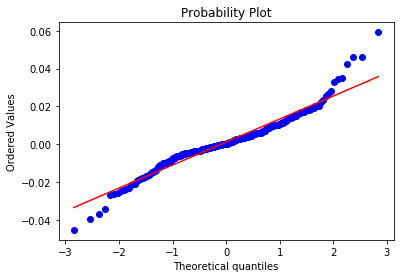

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import quandl

quandl.ApiConfig.api_key = 'FA6wt7Na6c5FdbqM96i4'
aapl_close = quandl.get("WIKI/AAPL", start_date = '2017-01-01', end_date = '2018-09-01')['Close']
aapl_returns = np.log(aapl_close / aapl_close.shift(1))[1:]
stats.probplot(aapl_returns, dist="norm", plot=plt)
plt.show()

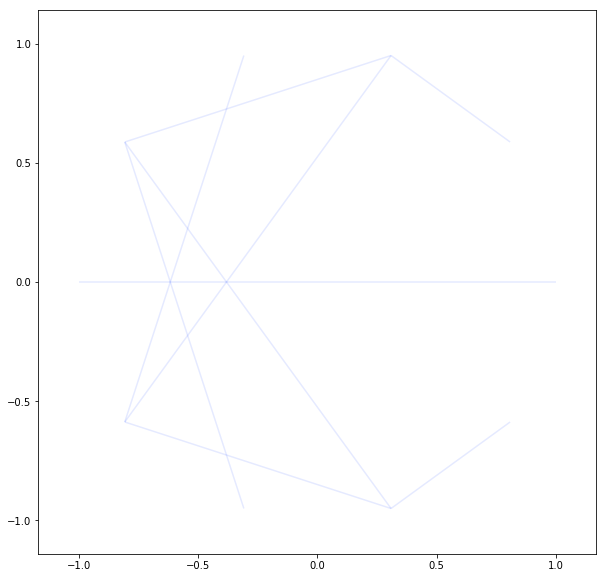

In [65]:
# ref https://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import collections  as mc

mod = 10
mult = 2
lines = []
line_colors = []
alpha = 0.1
for a in np.arange(0, 2 * np.pi, 2 * np.pi / mod):
    a2 = a * mult
    lines.append([(np.cos(a), np.sin(a)), (np.cos(a2), np.sin(a2))])
    c = [0, .2, 1, alpha]
    line_colors.append(c)

lc = mc.LineCollection(lines, colors=line_colors)
fig, ax = plt.subplots()
plt.setp(ax, 'alpha', 0.01)

ax.add_collection(lc)
ax.set_aspect('equal', 'datalim')
ax.margins(0.1)
fig.set_size_inches(10, 10)
# fig.savefig("foo.pdf", bbox_inches='tight')